In [2]:
import json
import random
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from termcolor import colored

from data_loading import load_tlc_samples
from models import Match, SampleCollection
from config import TLCPaths

In [3]:
def show_search_score_proportion(matches):
    nums_matched = []
    x = np.linspace(0, 1, 10)
    for threshold in x:
        num_matched = len([match for match in matches if match['score'] > threshold])
        nums_matched.append(num_matched / len(matches))

    fig, ax = plt.subplots()
    ax.plot(x, nums_matched)
    ax.set_xlabel("score threshold")
    ax.set_ylabel("% matched")
    ax.grid()
    plt.show()


In [4]:
for file in TLCPaths.project_data_path.iterdir():
    if "matched_solr" in str(file.name):
        print(file.name)

matched_solr_20230602-111758.json
not_matched_solr_20230602-111759.json


In [5]:
matched_file_path = TLCPaths.project_data_path.joinpath("matched_solr_20230602-111758.json")
not_matched_file_path = TLCPaths.project_data_path.joinpath("not_matched_solr_20230602-111759.json")
# load the two json files 
with open(matched_file_path, "r") as f:
    matched = [x for x in json.load(f)]
with open(not_matched_file_path, "r") as f:
    not_matched = [x for x in json.load(f)]

In [6]:
print(f"{len(matched)=}")
print(f"{len(not_matched)=}")


len(matched)=997
len(not_matched)=0


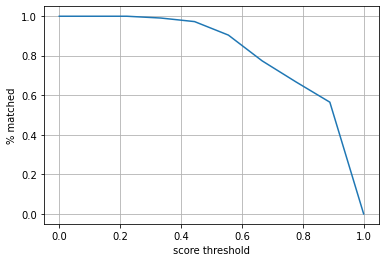

In [7]:
show_search_score_proportion(matched)

In [8]:
matched[0]

{'cui': ['C0016204'],
 'source': ['MDRGER'],
 'language': ['GER'],
 'name': ['Flatulenz'],
 'index_term': ['flatulenz'],
 'id': '724154c9-63d4-4658-ba0d-d6b1708574bf',
 '_version_': 1760194257559224321,
 'score': 1.0,
 'stem': 'flatulenz'}

In [9]:
def print_n_matches(matches, n=10):
    for matched_item in random.sample(matches, n):
        print(matched_item['stem'], " matched with ", matched_item['index_term'],
              f"(score = {matched_item['score']})")
        print()


print_n_matches(matched)

oraler glukosetoleranztest  matched with  ['glukosetoleranztest'] (score = 0.7307692)

harnleiterstriktur  matched with  ['harnleiterstriktur'] (score = 1.0)

sedierung  matched with  ['sedierung uebermaessig'] (score = 1.0)

hypothyreo  matched with  ['hypothyreo'] (score = 1.0)

normofrequ  matched with  ['formocresol'] (score = 0.5454545)

symptom der nierenbeckenentzundung  matched with  ['oberkieferhohlenentzundung'] (score = 0.5294118)

krankenhau  matched with  ['zahnmedizinisch personal, krankenhau'] (score = 1.0)

umbilicu  matched with  ['umbilicu'] (score = 1.0)

zu viel protein im uri  matched with  ['multiproteinkomplex'] (score = 0.45454544)

abs  matched with  ['fta-abs-test'] (score = 1.0)



In [10]:
threshold = 0.75  # some false negatives with .7, so .69 seems to work good
cutoff_matches = [match for match in matched if match['score'] > threshold]
below_cutoff = [match for match in matched if match['score'] <= threshold]
print(len(cutoff_matches), '/', len(matched))
print("not initially matched: ", len(not_matched))
print_n_matches(cutoff_matches)

672 / 997
not initially matched:  0
parasthesie  matched with  ['parasthesie'] (score = 1.0)

entfernung  matched with  ['entfernung'] (score = 1.0)

hypnotikum  matched with  ['hypnotika'] (score = 0.8)

ersetz  matched with  ['immunglobuli leich ketten, ersatz'] (score = 0.8333333)

magenulcu  matched with  ['magenulku'] (score = 0.8888889)

internist  matched with  ['internet'] (score = 0.7777778)

afebril  matched with  ['afebril krampfanfall'] (score = 1.0)

nierenzellkarzinom  matched with  ['nierenzellkarzinom unbekann stadium'] (score = 1.0)

pharynx  matched with  ['pharynx'] (score = 1.0)

anasthesie  matched with  ['anasthesie'] (score = 1.0)



In [11]:
print_n_matches(below_cutoff)

antivertiginosa  matched with  ['antipruriginosa'] (score = 0.73333335)

akute pankreatiti  matched with  ['lupuspankreatiti'] (score = 0.7058823)

nako  matched with  ['naio'] (score = 0.75)

perfusionsstorung  matched with  ['herzfunktionsstoerung postoperativ'] (score = 0.71428573)

symptom am ehesten bedingt durch muskelkontraktionen aufgrund von nierenstein-abgang  matched with  ['zahnprothesenidentifikationsmarkierung'] (score = 0.26190478)

uniklinik  matched with  ['poliklinik'] (score = 0.7)

normoglykamie  matched with  ['hypoglykamie'] (score = 0.6923077)

infertil  matched with  ['nosokomial infektio'] (score = 0.75)

infrascapular  matched with  ['membranen, intrazellular-'] (score = 0.6153846)

zervikale lymphadenopathie  matched with  ['lymphadenopathie sklerosier'] (score = 0.6153846)



In [12]:
# print_n_matches(not_matched)

In [13]:
# combine not matched by score and not matched by solr
below_cutoff = not_matched + below_cutoff

In [14]:
print(
    f"Unique matched terms = {len(cutoff_matches)}")
print(
    f"Unique non-matched terms = {len(below_cutoff)}")


Unique matched terms = 672
Unique non-matched terms = 325


In [19]:
cutoff_matches[0]

{'cui': ['C0016204'],
 'source': ['MDRGER'],
 'language': ['GER'],
 'name': ['Flatulenz'],
 'index_term': ['flatulenz'],
 'id': '724154c9-63d4-4658-ba0d-d6b1708574bf',
 '_version_': 1760194257559224321,
 'score': 1.0,
 'stem': 'flatulenz'}

In [15]:
samples_to_annotate_path = TLCPaths.project_data_path.joinpath("samples_to_annotate.json")
samples_to_validate_path = TLCPaths.project_data_path.joinpath("samples_to_validate.json")
with open(samples_to_annotate_path, "w") as fp:
    json.dump([sample for sample in below_cutoff], fp)
    
with open(samples_to_validate_path, "w") as fp:
    json.dump([sample for sample in cutoff_matches], fp)

## Analyze not mached mentions

In [17]:
sample_collection = SampleCollection(load_tlc_samples())
annotations = [ann for sample in load_tlc_samples() for ann in sample.annotations]

with open(TLCPaths.project_data_path.joinpath('search_terms_single_and_ids.json'), 'r') as fp:
    terms_and_ids = json.load(fp)
    
import os
os.environ["FORCE_COLOR"] = "1"

In [18]:
for search_term in below_cutoff[:10]:
    unique_ids = terms_and_ids[search_term['stem']]
    annotation = next(ann for ann in annotations if ann.id in unique_ids)
    sample = sample_collection.get_sample_by_annotation_id(annotation.id)
    text = sample.text
    colored_mention = colored(text[annotation.span_start:annotation.span_end], "red")
    text_with_colors = text[:annotation.span_start] + colored_mention + text[annotation.span_end:]
    print(text_with_colors)

Thread: [Unerklärliche Bauchschmerzen]
Text: [Hallo!
Auch ich dachte laut der Beschwerden von einigen von euch gleich an Gallensteine.
Beim Ultraschall muss man komplett nüchtern sein, d.h. nicht mal Wasser trinken vorher, sonst kann man bei der Gallenblase nichts erkennen. Es gibt auch Gallensteine in den Gallengängen, wobei leider eine Ultraschalluntersuchungen meistens nicht reicht um diese zu erkennen. Da kann man eine ERCP (Sp\u00edegelung) machen.
Obwohl ich aber glaube, dass sie eure Ärzte die einen Oberbauchultraschall bei euch gemacht haben, sich die Gallenblasen sicher genau angesehen haben, da die Beschwerden ja auch dafür in Frage kommen.]

Thread: [Ständiges Völlegefühl, Aufstoßen, Blähungen]
Text: [Wenn du Helicobacter hast hält es an bis du behandelt wurdest. Man kann ihn relativ leicht bei einer Magenspiegelung nachweisen.
Eine Gastritis heilt, wenn sie schon länger besteht, nicht von heute auf morgen. Dazu braucht es leichte Kost, und meist gibt man PPI. Das Ranitidin 